# Business Understanding

## Project Domain
Gagal jantung adalah salah satu penyebab utama kematian di seluruh dunia. Penyakit ini terjadi ketika jantung tidak mampu memompa darah dengan baik, yang bisa menyebabkan komplikasi serius atau bahkan kematian. Deteksi dini dan analisis faktor risiko yang berkontribusi terhadap gagal jantung sangat penting untuk meningkatkan peluang pengobatan dan pencegahan lebih awal.

## Problem Statements
Bagaimana cara menggunakan data klinis untuk mengidentifikasi pasien dengan

1.Bagaimana cara menggunakan data klinis untuk mengidentifikasi pasien dengan risiko tinggi mengalami gagal jantung?
2.Faktor apa saja yang paling berpengaruh terhadap kemungkinan gagal jantung?
3.Seberapa akurat model ANN dalam memprediksi gagal jantung dibandingkan metode lainnya?

## Goals
Tujuan dari proyek ini adalah membangun model Artificial Neural Network (ANN) yang bisa memprediksi kemungkinan gagal jantung berdasarkan data klinis pasien. Dengan metode CRISP-DM, proyek ini akan melalui tahapan eksplorasi data, pemodelan, evaluasi, dan implementasi agar hasilnya lebih terstruktur dan akurat.

## Solution Statements
Proyek ini akan membangun model Artificial Neural Network (ANN) dengan menggunakan dataset "Heart Failure Clinical Data". Model ini akan melalui tahapan preprocessing data, pelatihan model, evaluasi, dan interpretasi hasil. Beberapa langkah yang akan dilakukan meliputi:



1.   Preprocessing Data: Membersihkan data, menangani nilai yang hilang, dan melakukan normalisasi fitur agar siap digunakan dalam model ANN.
2.   Feature Selection: Mengidentifikasi variabel yang memiliki pengaruh signifikan terhadap kemungkinan gagal jantung.
3. Pembangunan Model ANN: Melatih model dengan berbagai arsitektur jaringan saraf tiruan dan mengoptimalkan parameter untuk mendapatkan performa terbaik.
4. Evaluasi Model: Menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score untuk menilai efektivitas model dalam prediksi gagal jantung.
5. Interpretasi dan Implementasi: Menganalisis faktor-faktor yang paling berpengaruh dan mengevaluasi bagaimana model dapat diterapkan dalam lingkungan medis.

# Data Understanding

## Import data dari kaggle

In [63]:
from google.colab import files
files.upload()
import shutil
import os
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Saving kaggle.json to kaggle.json


In [64]:
!pip install kaggle

In [65]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
!unzip heart-failure-clinical-data.zip -d dataset

Archive:  heart-failure-clinical-data.zip
replace dataset/heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import Library yang dibutuhkan

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.random import set_seed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [68]:
data = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [69]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [71]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

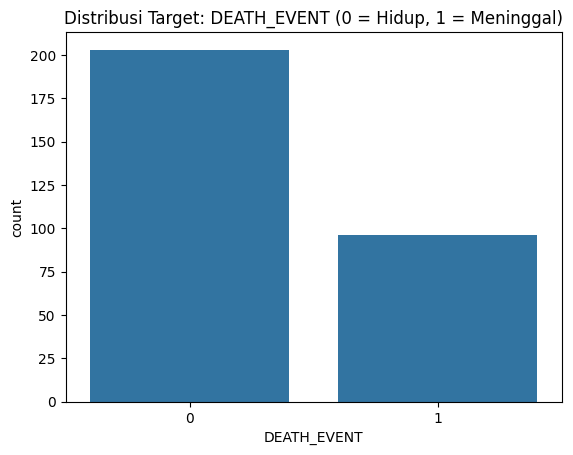

Persentase:
DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64


In [72]:
# Plot distribusi DEATH_EVENT
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Distribusi Target: DEATH_EVENT (0 = Hidup, 1 = Meninggal)')
plt.show()
print("Persentase:")
print(data['DEATH_EVENT'].value_counts(normalize=True) * 100)

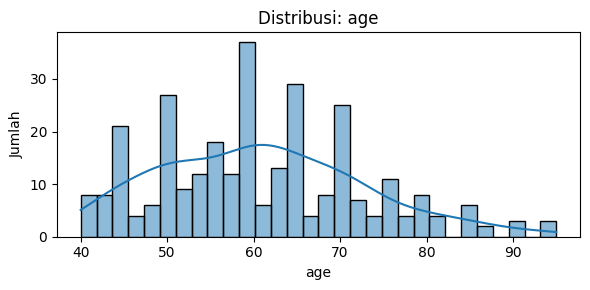

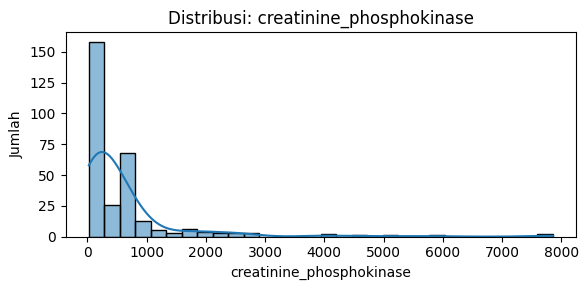

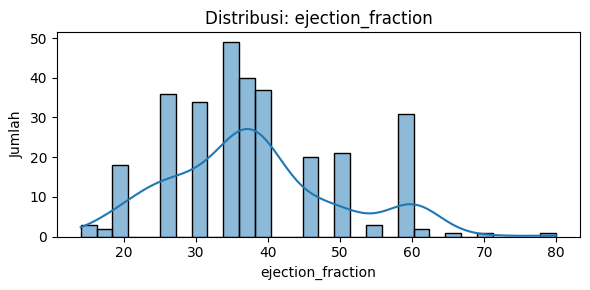

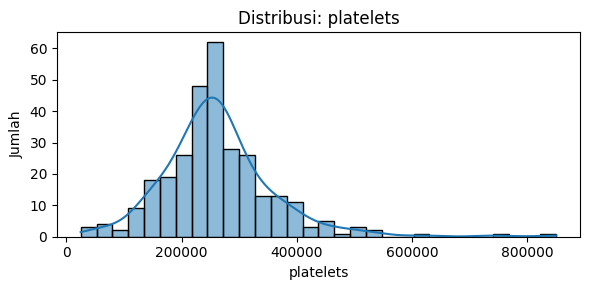

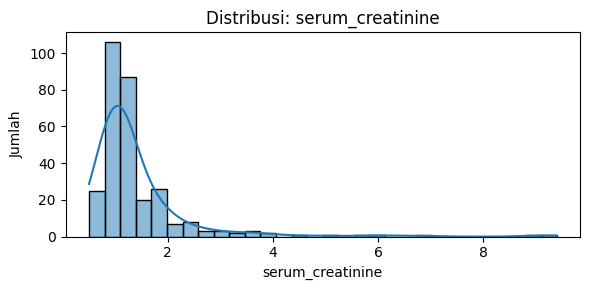

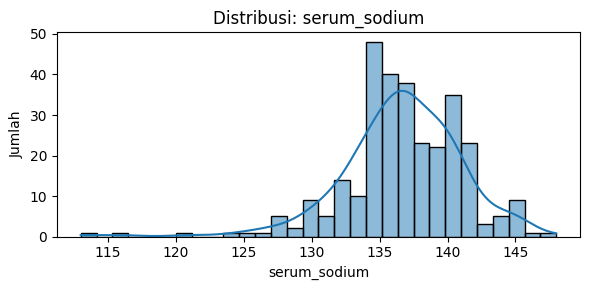

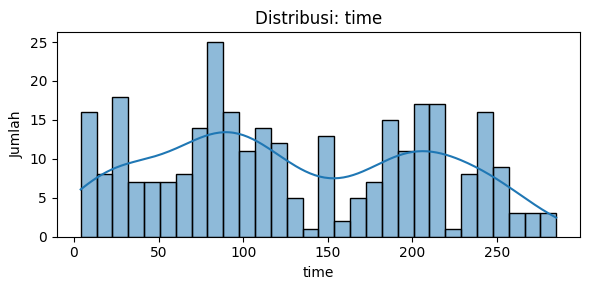

In [73]:
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

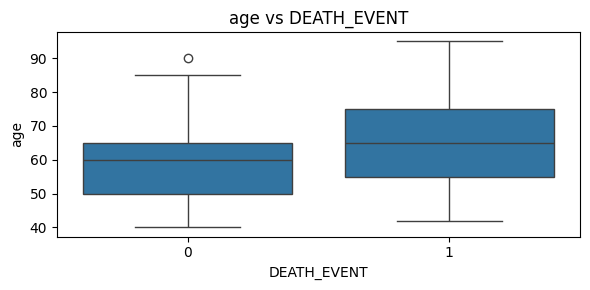

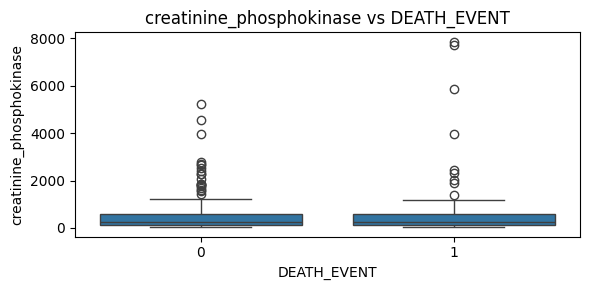

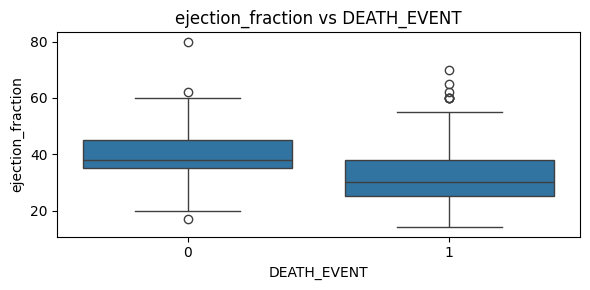

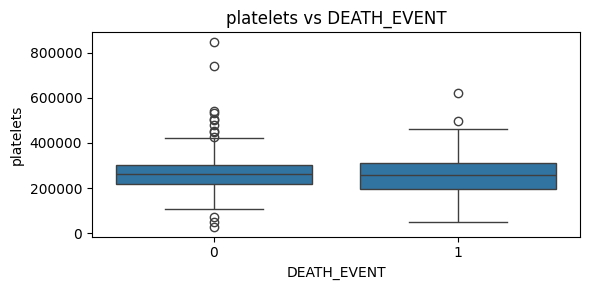

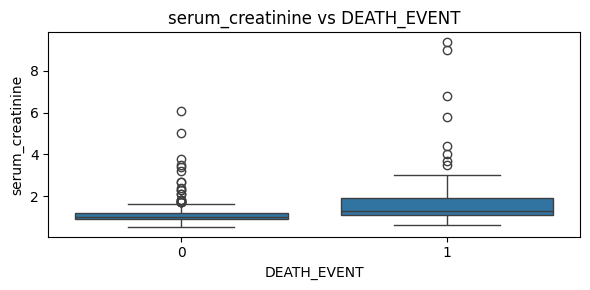

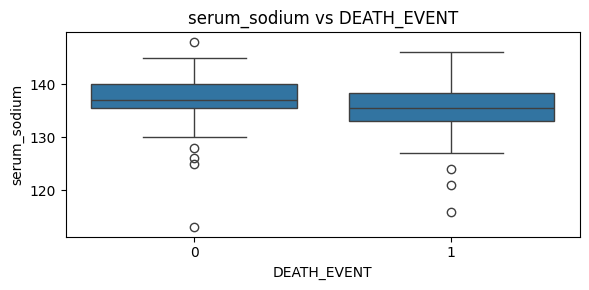

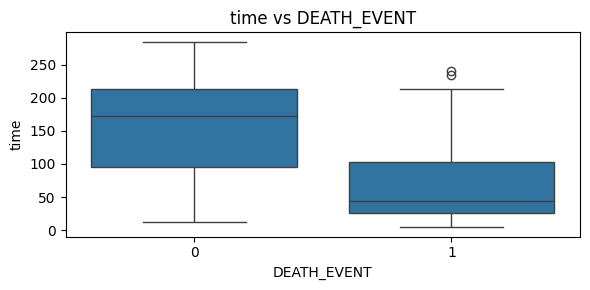

In [74]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='DEATH_EVENT', y=col, data=data)
    plt.title(f'{col} vs DEATH_EVENT')
    plt.tight_layout()
    plt.show()

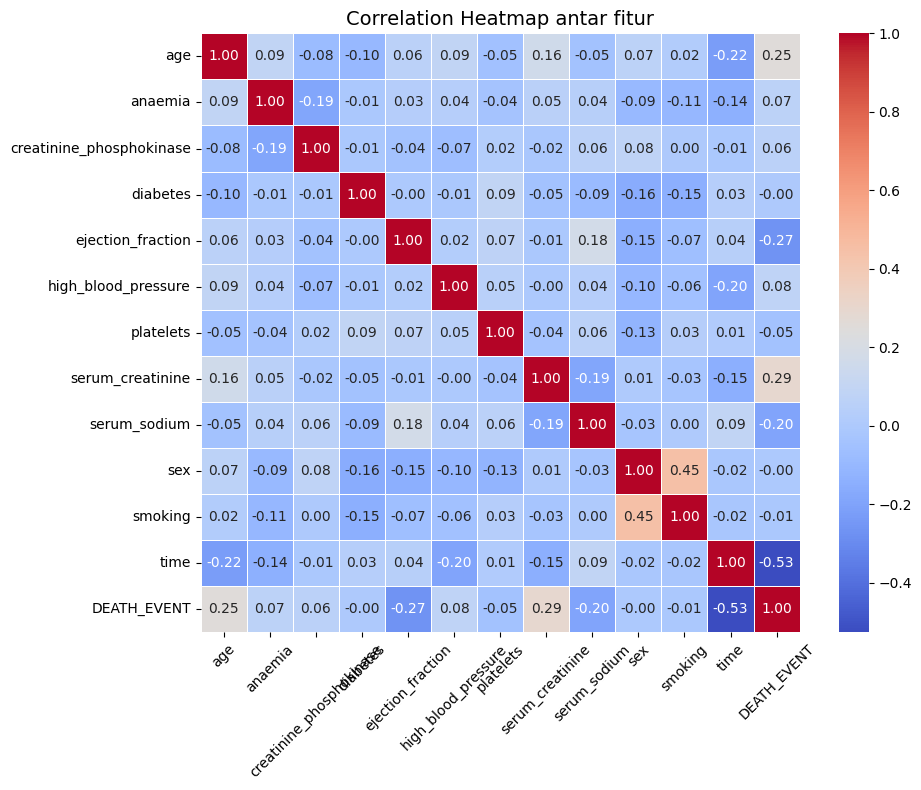

In [75]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Heatmap antar fitur", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


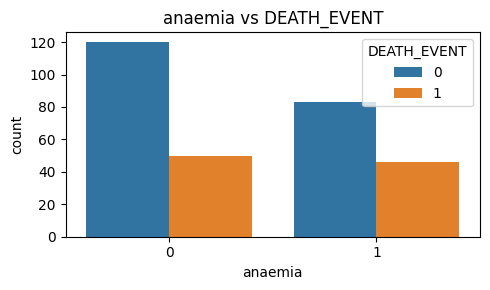

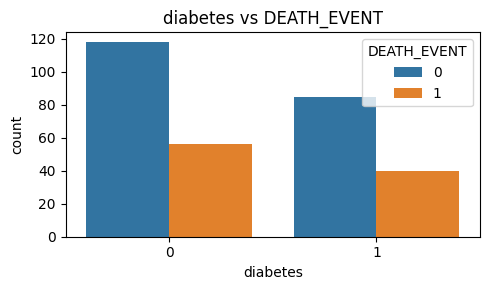

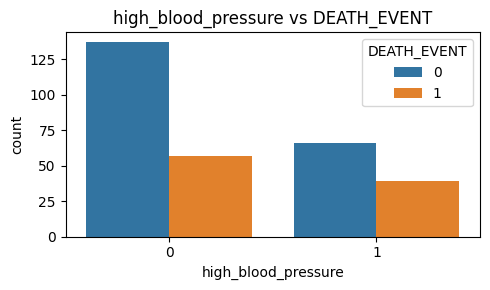

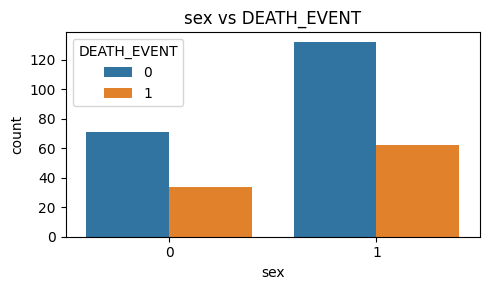

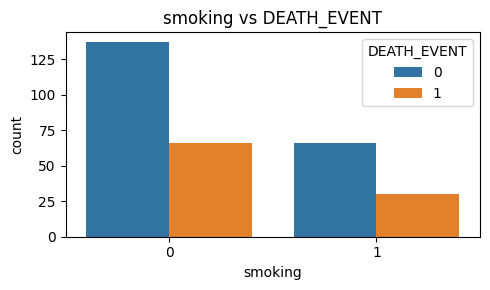

In [76]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='DEATH_EVENT', data=data)
    plt.title(f'{col} vs DEATH_EVENT')
    plt.tight_layout()
    plt.show()

# Data Preparation

In [77]:
# ngecek missing values
print("Jumlah missing values per kolom:")
print(data.isnull().sum())

Jumlah missing values per kolom:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [78]:
set_seed(42)
np.random.seed(42)

In [79]:
selected_features = [
    'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
    'anaemia', 'high_blood_pressure', 'sex'
]

X = data[selected_features]
y = data['DEATH_EVENT']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [81]:
num_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# Inisialisasi scaler
scaler = StandardScaler()

# Fit-transform data latih, transform data uji
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Modeling

In [82]:
model = Sequential()

# Input layer + hidden layer 1
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer 2
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [85]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5550 - loss: 0.6801 - val_accuracy: 0.5417 - val_loss: 0.6713
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6674 - loss: 0.6596 - val_accuracy: 0.6667 - val_loss: 0.6561
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6905 - loss: 0.6439 - val_accuracy: 0.6667 - val_loss: 0.6431
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7092 - loss: 0.6295 - val_accuracy: 0.6458 - val_loss: 0.6314
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7120 - loss: 0.6150 - val_accuracy: 0.6458 - val_loss: 0.6197
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7149 - loss: 0.6002 - val_accuracy: 0.6458 - val_loss: 0.6084
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7516 - loss: 0.5851 - val_accuracy: 0.6458 - val_loss: 0.5980
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7739 - loss: 0.5698 - val_accuracy: 0.

In [86]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model di Test Set: {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8153 - loss: 0.3739
Akurasi Model di Test Set: 0.82


# Evaluation

In [87]:
# ini probabilitas
y_pred_prob = model.predict(X_test)
y_pred_class = (y_pred_prob > 0.5).astype(int)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [88]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Confusion Matrix:
[[37  4]
 [ 7 12]]


In [89]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



## Model Simulation

In [90]:
# Bikin data baru sebagai DataFrame
new_data = pd.DataFrame([[
    65,   # age
    38,   # ejection_fraction
    1.1,  # serum_creatinine
    135,  # serum_sodium
    130,  # time
    0,    # anaemia
    1,    # high_blood_pressure
    1     # sex
]], columns=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
             'anaemia', 'high_blood_pressure', 'sex'])

# Normalisasi hanya kolom num_cols
new_data_scaled_part = scaler.transform(new_data[num_cols])

# Bikin Dataframe dari hasil normalisasi
new_data_scaled_df = pd.DataFrame(new_data_scaled_part, columns=num_cols)

# Gabungkan kembali dengan kolom kategori
for col in ['anaemia', 'high_blood_pressure', 'sex']:
    new_data_scaled_df[col] = new_data[col].values

#Urutan kolom harus sama kaya X_train
new_data_scaled_df = new_data_scaled_df[X_train.columns]

# Prediksi
prediction_prob = model.predict(new_data_scaled_df)
prediction = (prediction_prob > 0.5).astype(int)

# Hasil Prediksi
if prediction[0] == 1:
    print("Pasien diprediksi MENINGGAL akibat gagal jantung.")
else:
    print("Pasien diprediksi TIDAK MENINGGAL akibat gagal jantung.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Pasien diprediksi TIDAK MENINGGAL akibat gagal jantung.


## Save Model

In [91]:
# Save model ke .h5
model.save('model_heart_failure.h5')

In [92]:
# Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp8xun7tk4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135737608884432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737608881168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737608891344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737608886736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737608891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135737608893648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [93]:
# Save hasil TFLite-nya ke file
with open('model_heart_failure.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil disimpan ke model_heart_failure.tflite")

Model berhasil disimpan ke model_heart_failure.tflite


# Deployment

In [94]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']